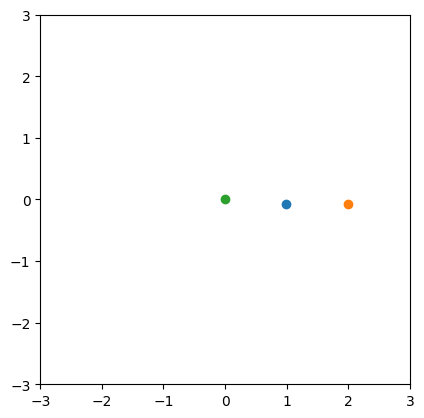

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.animation import FuncAnimation
import numpy as np



norbs = 4

def circle(phi,r):
    return np.array([r*np.cos(phi), r*np.sin(phi)])

fig, ax = plt.subplots()
ax.axis([-3,3,-3,3])
ax.set_aspect("equal")

p1, = ax.plot(0,1, marker="o")
p2, = ax.plot(0,2, marker="o")
sun = ax.plot(0,0, marker="o")

def update(phi):
    x1,y1 = circle(phi,1)
    x2,y2 = circle(phi/2,2)
    p1.set_data([x1],[y1])
    p2.set_data([x2],[y2])
    return p1,p2,


ani1 = FuncAnimation(fig, update, interval=10, blit=True, repeat=True,
                    frames=np.linspace(0,norbs*2*np.pi,360, endpoint=False))

from IPython.display import HTML
HTML(ani1.to_jshtml())

In [6]:
# Object-Oriented Programming

class Planet(object):
    """
    A simulated particle that moves in 3D

    TODO: this is just a place holder for now. We need to figure out what fields go in here. 
    """
    def __init__(self):
        pass


class Exoplanet(Planet):
    """
    Simulate a particle falling due to Earth's gravity. Particle is stationary at first

    Args:
        height (float): a height in meters
        dt (float): timestep of the simulation in seconds
    """
    def __init__(self, per, a):
        """
        Function that is run to initialize the class.

        The input `self` is required for functions that belong to an object,
        meaning that you want to make the function access and/or depend on the 
        attributes of the object (e.g., self.time, and self.velocity below)
        """
        # let's initalize it's parent class (empty for now because it is a blank class)
        super().__init__()

        # note that we are not using the astropy.units class here as we haven't talked about it yet! But it could be useful!
        self.per = per
        self.a = a



    def get_num_steps_run(self):
        """
        Function that returns the number of timesteps that have run by comparing self.time with self.dt

        Returns:
            num_steps (int): number of time steps already completed in the simulation
        """
        num_steps = int(self.time / self.dt)
        return num_steps

    ##### Activity ######
    """
    Add functionality to advance the particle's height by one time step at a time. (hint: implement the function below).
    Then use this code to calculate how long it takes for the particle to fall down from a height of 10 meters.

    Some useful equations for how to calculate the particle's new state at the next time step.
    Pseudo code below:
    acceleration = g
    new_velocity = current_velocity + acceleration * dt
    new_height = current_height + new_velocity * dt

    Add inputs and outputs. 
    """
    def simulate_timestep(self):
        """
        Advance the simulation time by a single timestep (self.dt). 
        Update the simulation with the new time, height, and velocity

        Returns:
            height (float): the current height in meters
        """
        self.velocity += self.dt*self.g
        self.height += self.velocity*self.dt
        self.time += self.dt

    def run_til_fall(self):
        
        while self.height>=0:
            print("Time: "+str(self.time))
            print("Height: "+str(self.height))
            print('Steps: '+str(self.get_num_steps_run()))
            self.simulate_timestep()

        ## HINT: Modify code here
        return 0. # currently does nothing

In [9]:
#example to use query to get planet_radius, orbital_period, semi_major_axis, planet_mass, stellar_radius, stellar_temp

from parameterquery import query_parameters

#using Kelt-9 b as an example, next we can make a class 

kelt9b = query_parameters('KELT-9 b')

#convert tuple to numpy array

kelt9b_array = np.array(kelt9b)

print(kelt9b_array)

rp = kelt9b_array[0] * u.R_jupiter
period = kelt9b_array[1] * u.day
a = kelt9b_array[2] * u.au
mp = kelt9b_array[3] * u.M_jupiter
rstar = kelt9b_array[4] * u.R_sun
tstar = kelt9b_array[5] * u.K

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from astropy import units as u

tstar

In [ ]:
#converting a, rstar and rp to km and then scaling them to 10^-5
#defining "something"_plot variables to use for plotting

rp_km = (rp.to(u.km))/(10**5)
rp_plot = rp_km.value
rstar_km = (rstar.to(u.km))/(10**5)
rstar_plot = rstar_km.value
a_km = (rp.to(u.km))/(10**5)
a_plot = rp_km.value



NameError: name 'a_plot' is not defined

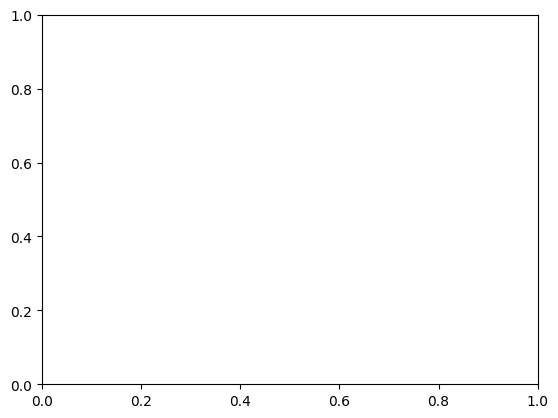

In [8]:
#an example with scaled rp, rstar and a

norbs = 4

def circle(phi,r):
    return np.array([r*np.cos(phi), r*np.sin(phi)])

fig, ax = plt.subplots()
ax.axis([-3*a_plot,3*a_plot,-3*a_plot,3*a_plot])
ax.set_aspect("equal")

p1, = ax.plot(0,a_plot, marker="o", markersize = rp_plot)
#p2, = ax.plot(0,2, marker="o")
sun = ax.plot(0,0, marker="o", markersize = rstar_plot)

def update(phi):
    x1,y1 = circle(phi,a_plot)
    #x2,y2 = circle(phi/2,2)
    p1.set_data([x1],[y1])
    #p2.set_data([x2],[y2])
    return p1,


ani1 = FuncAnimation(fig, update, interval=10, blit=True, repeat=True,
                    frames=np.linspace(0,norbs*2*np.pi,360, endpoint=False))

from IPython.display import HTML
HTML(ani1.to_jshtml())

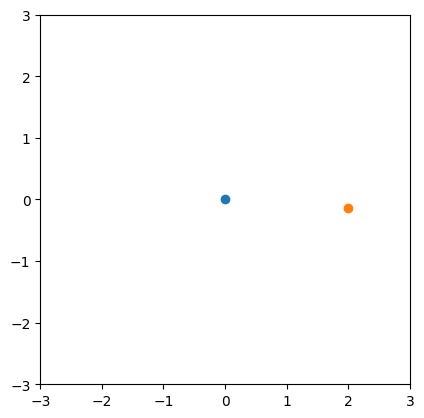

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.animation import FuncAnimation
import numpy as np



norbs = 4

def circle(phi,r):
    return np.array([r*np.cos(phi), r*np.sin(phi)])

fig, ax = plt.subplots()
ax.axis([-3,3,-3,3])
ax.set_aspect("equal")

sun = ax.plot(0,0, marker="o")

p1, = ax.plot(0,1, marker="o")


def update(phi,r):
    x1,y1 = circle(phi,r)
    p1.set_data([x1],[y1])
    return p1,p2,



ani1 = FuncAnimation(fig, update, interval=10, blit=True, repeat=True,
                frames=np.linspace(0,norbs*2*np.pi,360, endpoint=False),fargs=[1])
ani2 = FuncAnimation(fig, update, interval=10, blit=True, repeat=True,
                frames=np.linspace(0,norbs*2*np.pi,360, endpoint=False),fargs=[2])

from IPython.display import HTML
HTML(ani1.to_jshtml())
HTML(ani2.to_jshtml())

NameError: name 'FuncAnimation' is not defined

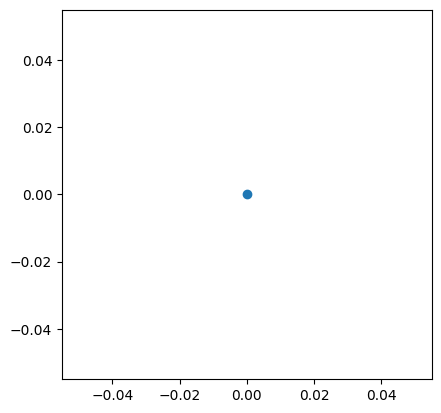

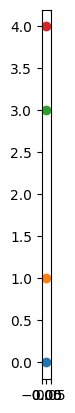

In [35]:
from anim_function import animator

In [29]:
list([1])

[1]